In [1]:
# 1. 나눔폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 2. 런타임 다시 시작
# 이 코드 셀 실행 후 상단 메뉴에서 [런타임] > [런타임 다시 시작]을 클릭하세요.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,649 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and dire

/tmp/ipython-input-2-2131261078.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/tmp/ipython-input-2-2131261078.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


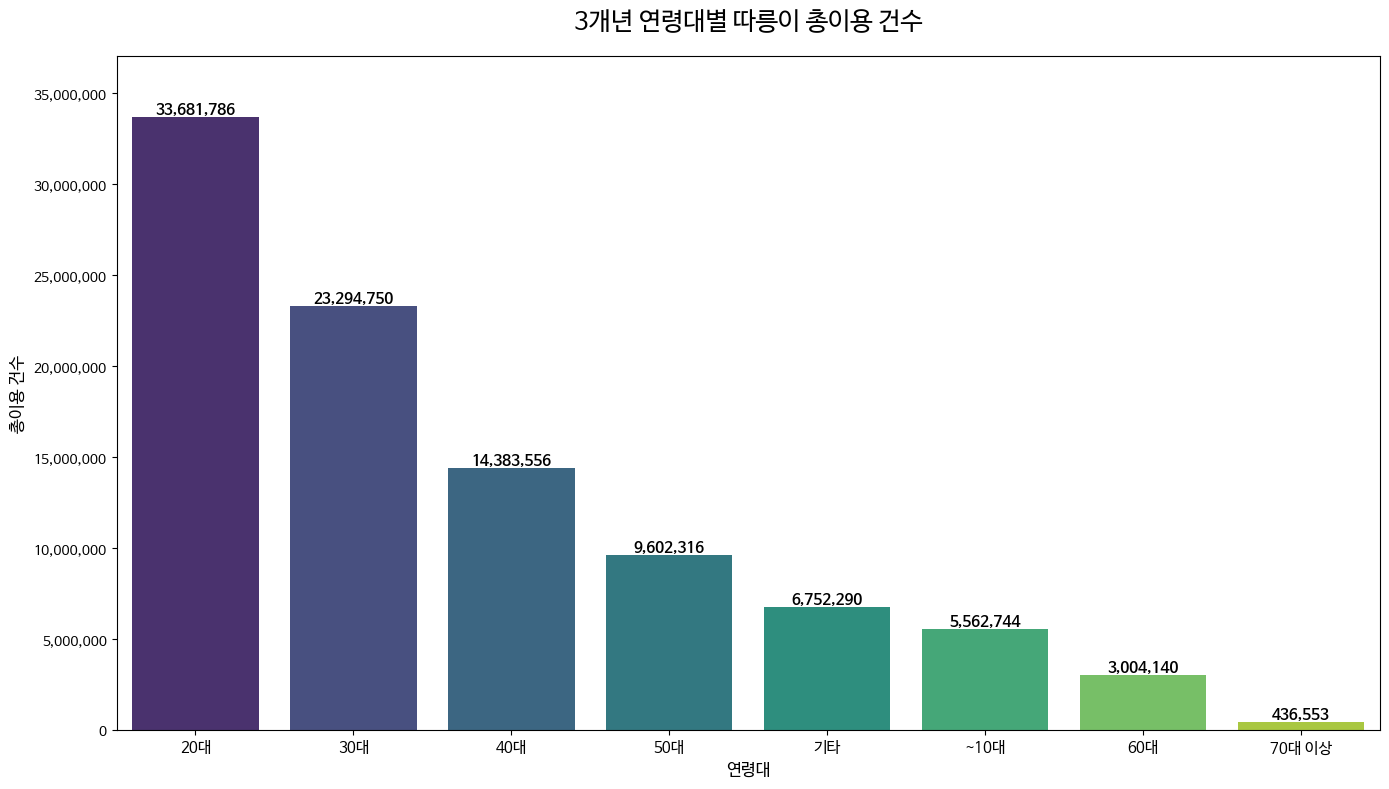

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

# 1. 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

# 2. 데이터 준비
csv_data = """구분,3개년 총합계 (2021~2023년)
20대,"33,681,786"
30대,"23,294,750"
40대,"14,383,556"
50대,"9,602,316"
기타,"6,752,290"
~10대,"5,562,744"
60대,"3,004,140"
70대 이상,"436,553"
총합계,"96,718,135"
"""

# 3. DataFrame으로 읽기
df = pd.read_csv(io.StringIO(csv_data), thousands=',')

# 4. 데이터 전처리
df_filtered = df[df['구분'] != '총합계'].copy()
df_sorted = df_filtered.sort_values(by='3개년 총합계 (2021~2023년)', ascending=False)

# 5. 막대그래프 시각화
plt.figure(figsize=(14, 8)) # 그래프 크기를 조금 더 키워서 숫자 공간 확보
barplot = sns.barplot(
    x='구분',
    y='3개년 총합계 (2021~2023년)',
    data=df_sorted,
    palette='viridis'
)

# 그래프 제목 및 축 레이블 설정
plt.title('3개년 연령대별 따릉이 총이용 건수', fontsize=18, pad=20)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('총이용 건수', fontsize=12)
plt.xticks(fontsize=11)

# y축 단위를 읽기 쉽게 변경
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# Y축의 최댓값을 10% 늘려 숫자 표시 공간 확보
plt.ylim(0, df_sorted['3개년 총합계 (2021~2023년)'].max() * 1.1)


# ==========================================================
# ▼▼▼▼▼▼▼▼▼▼▼▼▼▼ 이 부분이 추가되었습니다 ▼▼▼▼▼▼▼▼▼▼▼▼▼▼
# ==========================================================
# 각 막대 위에 숫자(총이용 건수)를 표시하는 반복문
for p in barplot.patches:
    # 막대의 높이(y값)를 가져와서 쉼표가 포함된 문자열로 포맷팅
    height_str = f'{int(p.get_height()):,}'

    # plt.text()를 사용하여 숫자 표시
    plt.text(
        p.get_x() + p.get_width() / 2.,   # x좌표 (막대의 가운데)
        p.get_height(),                  # y좌표 (막대의 맨 위)
        height_str,                      # 표시할 텍스트
        ha='center',                     # 수평 정렬 (가운데)
        va='bottom',                     # 수직 정렬 (아래)
        fontsize=11,
        fontweight='bold'
    )
# ==========================================================
# ▲▲▲▲▲▲▲▲▲▲▲▲▲▲ 여기까지 추가되었습니다 ▲▲▲▲▲▲▲▲▲▲▲▲▲▲
# ==========================================================


plt.tight_layout()
plt.show()